# 1.Opis

Postawiony przed nami problem to analiza płac w San Francisco. Celami analizy są:
- porównanie zmian w płacach różnych grup ludzi na przestrzeni lat 2011-2014
- sprawdzenie, jak podstawowa płaca, płaca za nadgodziny, premie, są rozalokowane w różnych grupach
- sprawdzenie, czy są dowody na to, że dochodzi do dyskryminacji ze względu na płeć w przełożeniu na płacę
- sprawdzenie, jak budżet jest rozalokowany na podstawie różnych grup i odpowiedzialności

Do zrealizowania wyżej postawionych celów należy:
- przypisać ludzi do grup
- przypisać ludzi do płci
- przypisać ludzi do odpowiedzialności

Dostarczone dane:
- Id - identyfikuje wiersz, nieprzydatne ze względu na cele biznesowe
- EmployeeName - imię i nazwisko osoby, przydatne do przypisania płci
- JobTitle - tytuł posady, przydatne do określenia grupy jak i odpowiedzialności
- BasePay - płaca podstawowa, przydatne do określenia płac na przestrzeni lat
- OvertimePay - płaca za nadgodziny, przydatne do określenia płac na przestrzeni lat
- OtherPay - płaca dodatkowa, przydatne do określenia płac na przestrzeni lat
- Benefits - premie, przydatne do określenia płac na przestrzeni lat
- TotalPay - suma wszystkich płac, przydatne do określenia płac na przestrzeni lat
- TotalPayBenefits - suma wszystkich płac plus premie
- Year - rok, przydatny do określenia płac na przestrzeni lat
- Notes - notatki, nieprzydatne ponieważ nigdzie nie jest wypełnione
- Agency - agencja, nieprzydatne ponieważ zawiera jędną wartość 'San Francisco'
- Status - typ zatrudnienia (pełen etat/niepełny etat)

Załadowanie bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Załadowanie danych

In [2]:
data = pd.read_table('Salaries.csv',sep=',')
firstnames = pd.read_table('names.csv',sep=',')

C:\Program Files\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Analiza wstępna

Z powodu tego, że dostarczone dane zawierają niepoprawne wartości - np. w kolumnach z atrybutami ilościowymi znajdują wartości tekstowe - zmuszeni zostaliśmy do przeprowadzenia analizy wstępnej i przygotowanie na jej podstawie danych do dalszej analizy.


In [3]:
print "Liczba wierszy: " + str(len(data))

Liczba wierszy: 148654


Poziom wypełnienia kolumn

In [4]:
def get_fill(column):
    return str(float(column.notnull().sum())/len(column)*100)

print "Wypełnienie Id: " + get_fill(data.Id) + "%"
print "Wypełnienie EmployeeName: " + get_fill(data.EmployeeName) + "%"
print "Wypełnienie JobTitle: " + get_fill(data.JobTitle) + "%"
print "Wypełnienie BasePay: " + get_fill(data.BasePay) + "%"
print "Wypełnienie OvertimePay: " + get_fill(data.OvertimePay) + "%"
print "Wypełnienie OtherPay: " + get_fill(data.OtherPay) + "%"
print "Wypełnienie Benefits: " + get_fill(data.Benefits) + "%"
print "Wypełnienie TotalPay: " + get_fill(data.TotalPay) + "%"
print "Wypełnienie TotalPayBenefits: " + get_fill(data.TotalPayBenefits) + "%"
print "Wypełnienie Year: " + get_fill(data.Year) + "%"
print "Wypełnienie Notes: " + get_fill(data.Notes) + "%"
print "Wypełnienie Agency: " + get_fill(data.Agency) + "%"
print "Wypełnienie Status: " + get_fill(data.Status) + "%"

Wypełnienie Id: 100.0%
Wypełnienie EmployeeName: 100.0%
Wypełnienie JobTitle: 100.0%
Wypełnienie BasePay: 99.5930146515%
Wypełnienie OvertimePay: 100.0%
Wypełnienie OtherPay: 100.0%
Wypełnienie Benefits: 75.6757302192%
Wypełnienie TotalPay: 100.0%
Wypełnienie TotalPayBenefits: 100.0%
Wypełnienie Year: 100.0%
Wypełnienie Notes: 0.0%
Wypełnienie Agency: 100.0%
Wypełnienie Status: 25.6427677695%


Wszak trzeba zauważyć, że pola liczbowe niezawierające danych są odpowiednikiem wypełnienia zerami.

Ilość unikalnych danych wraz z niepoprawnymi wartościami

In [5]:
print "Ilość unikalnych wartości (wraz z niewypełnioną):"
print "dla kolumny Id: " + str(len(data.Id.unique()))
print "dla kolumny EmployeeName: " + str(len(data.EmployeeName.unique()))
print "dla kolumny JobTitle: " + str(len(data.JobTitle.unique()))
print "dla kolumny BasePay: " + str(len(data.BasePay.unique()))
print "dla kolumny OvertimePay: " + str(len(data.OvertimePay.unique()))
print "dla kolumny OtherPay: " + str(len(data.OtherPay.unique()))
print "dla kolumny Benefits: " + str(len(data.Benefits.unique()))
print "dla kolumny TotalPay: " + str(len(data.TotalPay.unique()))
print "dla kolumny TotalPayBenefits: " + str(len(data.TotalPayBenefits.unique()))
print "dla kolumny Year: " + str(len(data.Year.unique()))
print "dla kolumny Notes: " + str(len(data.Notes.unique()))
print "dla kolumny Agency: " + str(len(data.Agency.unique()))
print "dla kolumny Status: " + str(len(data.Status.unique()))



Ilość unikalnych wartości (wraz z niewypełnioną):
dla kolumny Id: 148654
dla kolumny EmployeeName: 110811
dla kolumny JobTitle: 2159
dla kolumny BasePay: 109901
dla kolumny OvertimePay: 66555
dla kolumny OtherPay: 84968
dla kolumny Benefits: 99636
dla kolumny TotalPay: 138486
dla kolumny TotalPayBenefits: 142098
dla kolumny Year: 4
dla kolumny Notes: 1
dla kolumny Agency: 1
dla kolumny Status: 3


Liczba zduplikowanych wierszy:

In [6]:
print "Liczba powtarzających się wierszy: " + str(data.duplicated().sum())

Liczba powtarzających się wierszy: 0


# Przygotowanie danych do analizy - usunięcie zbędnych kolumn

Kolumna Id nie zawiera danych, które mogłyby zostać wykorzystane, dlatego postanowiliśmy ją usunąć

In [7]:
data.drop(["Id"],1,inplace=True)

Z powodu tego, że kolumna Notes nie zawiera żadnych atrybutów postanowiliśmy ją usunąć, gdyż nic nie wnosi.

In [8]:
data.drop(["Notes"],1,inplace=True)

Kolumna Agency zawiera tylko jedną wartość 'San Francisco', dlatego postanowiliśmy ją usunąć, gdyż nic nie wnosi.

In [9]:
data.drop(["Agency"],1,inplace=True)

# Przygotowanie danych do analizy - wypełnienie brakujących atrybutów

In [10]:
data.BasePay.fillna(0, inplace=True)
data.Benefits.fillna(0, inplace=True)

# Przygotowanie danych do analizy - normalizacja danych

In [11]:
data['EmployeeName'] = data['EmployeeName'].apply(lambda x: x.upper())
data['JobTitle'] = data['JobTitle'].apply(lambda x: x.upper())

# Przygotowanie danych do analizy - usunięcie zbędnych wierszy

In [12]:
data = data[data.JobTitle != "NOT PROVIDED"]
data = data[data.BasePay != "NOT PROVIDED"]
data = data[data.Benefits != "NOT PROVIDED"]
data = data[data.OtherPay != "NOT PROVIDED"]
data = data[data.OvertimePay != "NOT PROVIDED"]

# Przekonwertuj kolumny, które zostały błędenie zinterpretowane z powodu błędnych danych

In [13]:
data.BasePay = pd.to_numeric(data.BasePay)
data.Benefits = pd.to_numeric(data.Benefits)
data.OtherPay = pd.to_numeric(data.OtherPay)
data.OvertimePay = pd.to_numeric(data.OvertimePay)

# Zakresy zmienności atrybutów i wartości statystycznych

count    148650.000000
mean      66055.506718
std       42885.919334
min        -166.010000
25%       32798.550000
50%       64862.310000
75%       94609.715000
max      319275.010000
Name: BasePay, dtype: float64


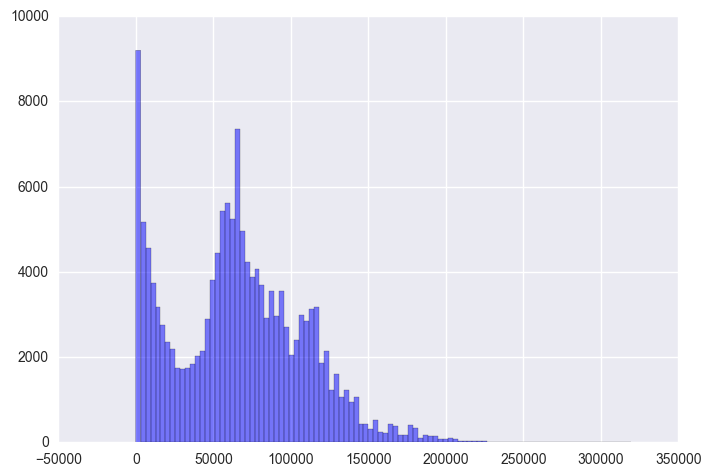

In [14]:
print data.BasePay.describe()
data.BasePay.hist(color='b', alpha=0.5, bins=100)

count    148650.000000
mean      18924.742068
std       17165.229731
min         -33.890000
25%           0.000000
50%       23217.135000
75%       33468.980000
max       96570.660000
Name: Benefits, dtype: float64


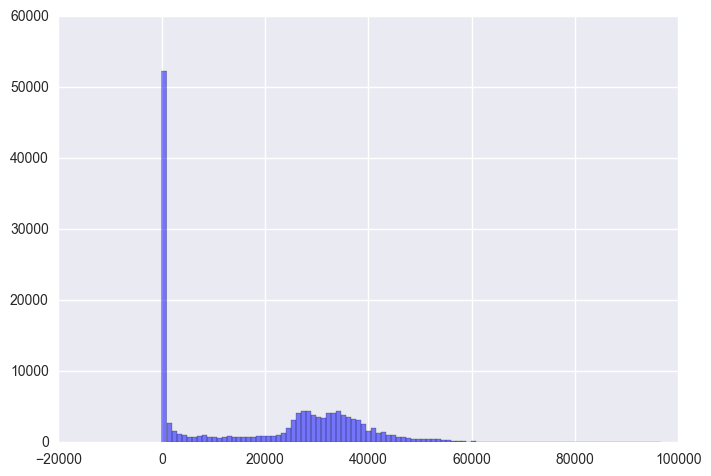

In [15]:
print data.Benefits.describe()
data.Benefits.hist(color='b', alpha=0.5, bins=100)

count    148650.000000
mean       3648.767297
std        8056.601866
min       -7058.590000
25%           0.000000
50%         811.270000
75%        4236.065000
max      400184.250000
Name: OtherPay, dtype: float64


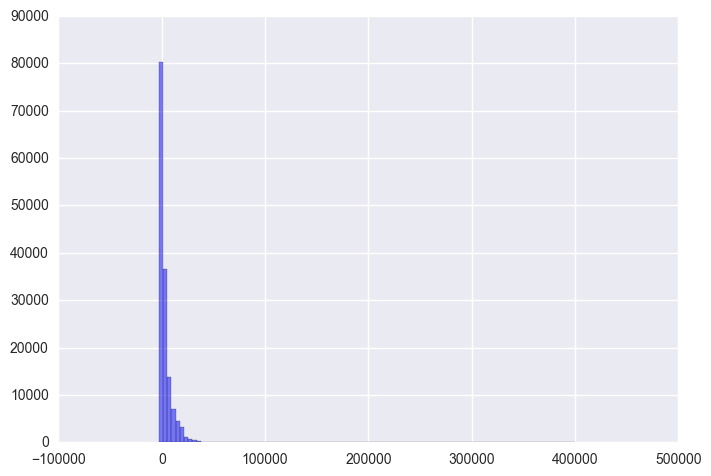

In [16]:
print data.OtherPay.describe()
data.OtherPay.hist(color='b', alpha=0.5, bins=100)

count    148650.000000
mean       5066.059886
std       11454.380559
min          -0.010000
25%           0.000000
50%           0.000000
75%        4658.175000
max      245131.880000
Name: OvertimePay, dtype: float64


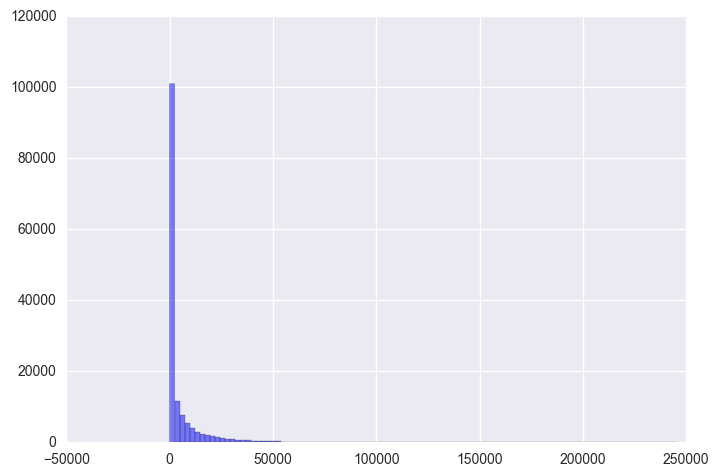

In [17]:
print data.OvertimePay.describe()
data.OvertimePay.hist(color='b', alpha=0.5, bins=100)

count    148650.000000
mean      74770.333901
std       50516.196009
min        -618.130000
25%       36169.955000
50%       71427.240000
75%      105842.960000
max      567595.430000
Name: TotalPay, dtype: float64


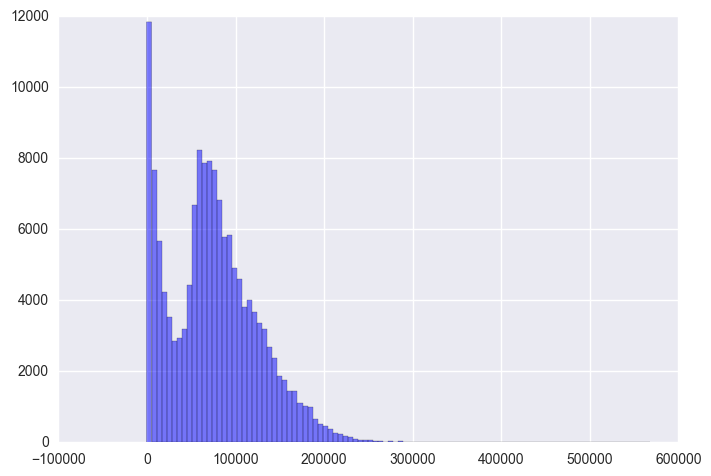

In [18]:
print data.TotalPay.describe()
data.TotalPay.hist(color='b', alpha=0.5, bins=100)

count    148650.000000
mean      93695.075969
std       62792.497391
min        -618.130000
25%       44073.337500
50%       92406.020000
75%      132877.992500
max      567595.430000
Name: TotalPayBenefits, dtype: float64


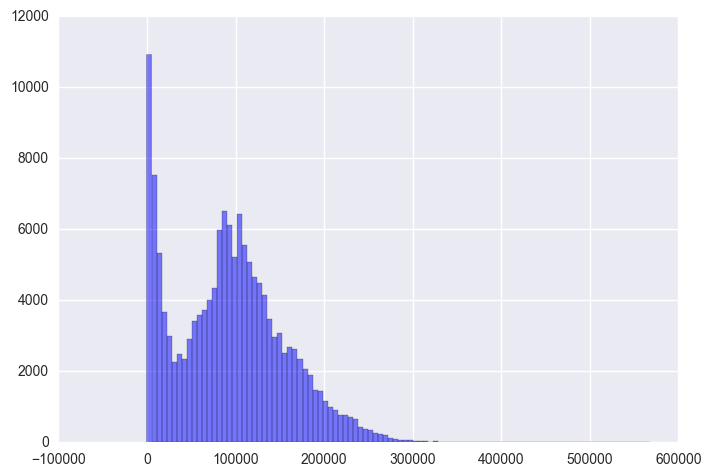

In [19]:
print data.TotalPayBenefits.describe()
data.TotalPayBenefits.hist(color='b', alpha=0.5, bins=100)

count    148650.000000
mean       2012.522603
std           1.117526
min        2011.000000
25%        2012.000000
50%        2013.000000
75%        2014.000000
max        2014.000000
Name: Year, dtype: float64


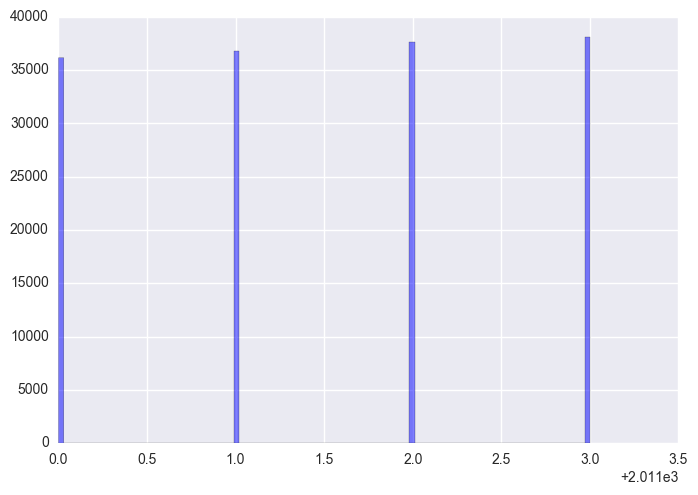

In [20]:
print data.Year.describe()
data.Year.hist(color='b', alpha=0.5, bins=100)

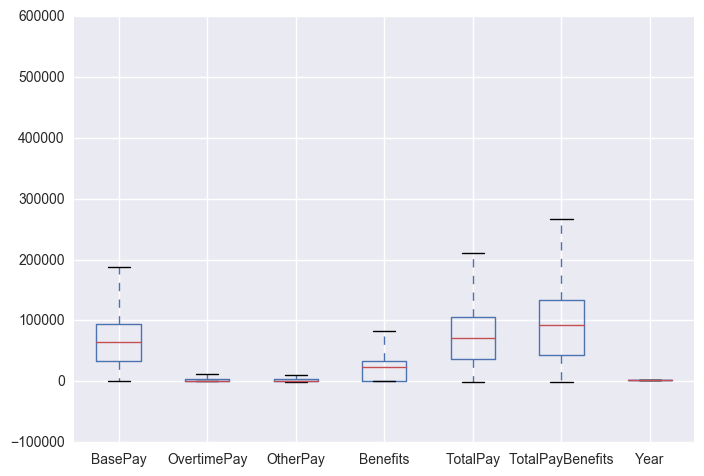

In [21]:
data.plot.box()

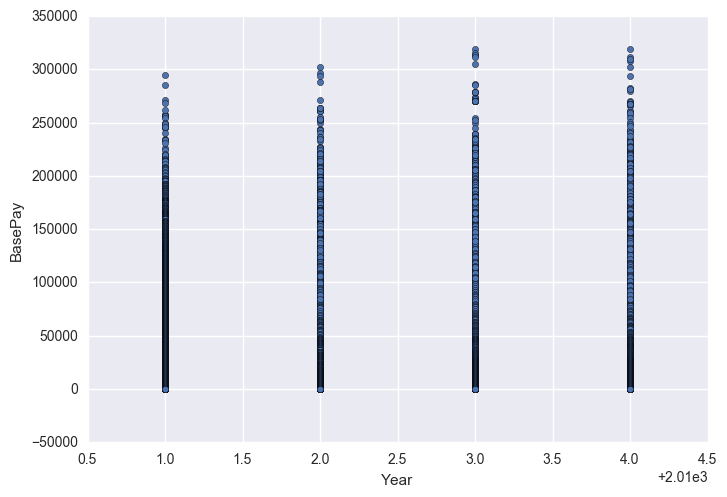

In [22]:
data.plot.scatter(x='Year',y='BasePay')

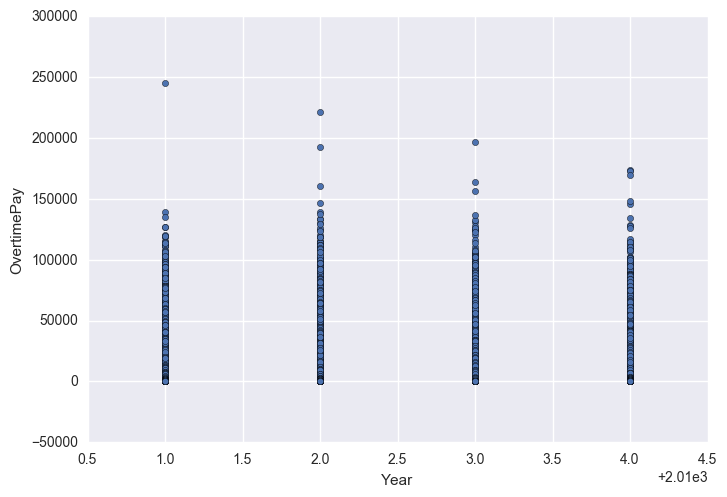

In [23]:
data.plot.scatter(x='Year',y='OvertimePay')

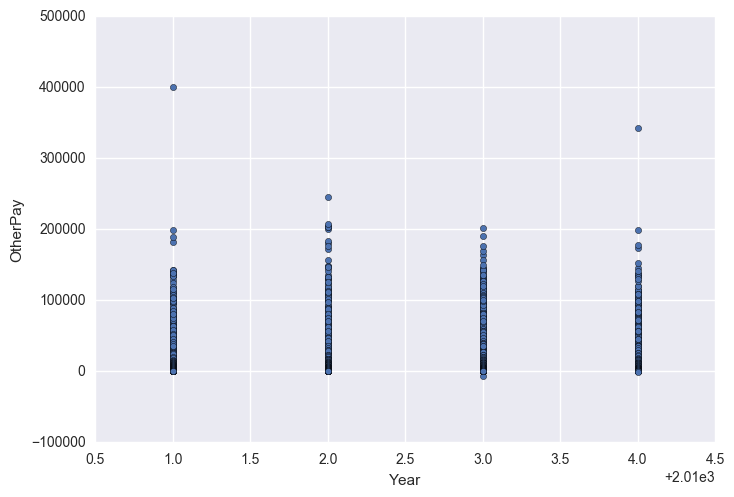

In [24]:
data.plot.scatter(x='Year',y='OtherPay')

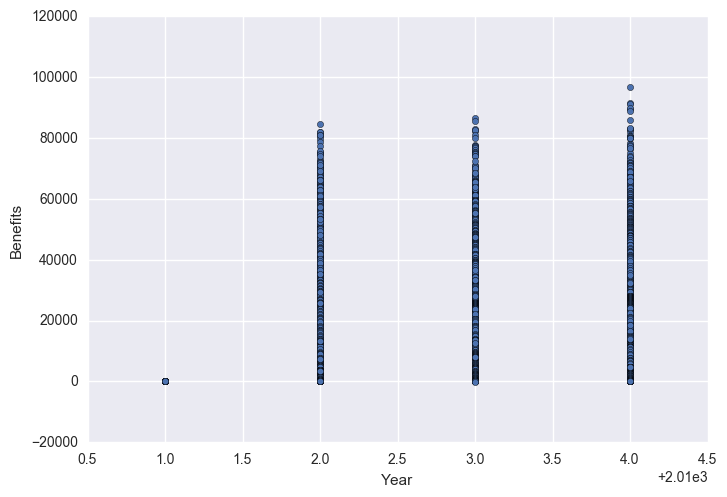

In [25]:
data.plot.scatter(x='Year',y='Benefits')

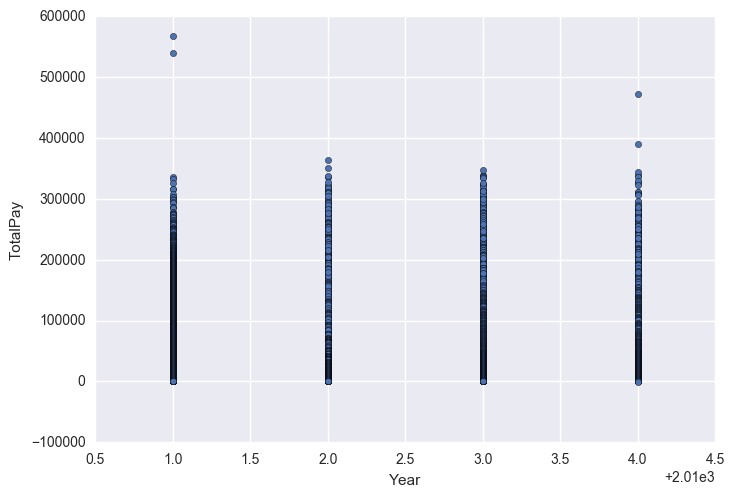

In [26]:
data.plot.scatter(x='Year',y='TotalPay')

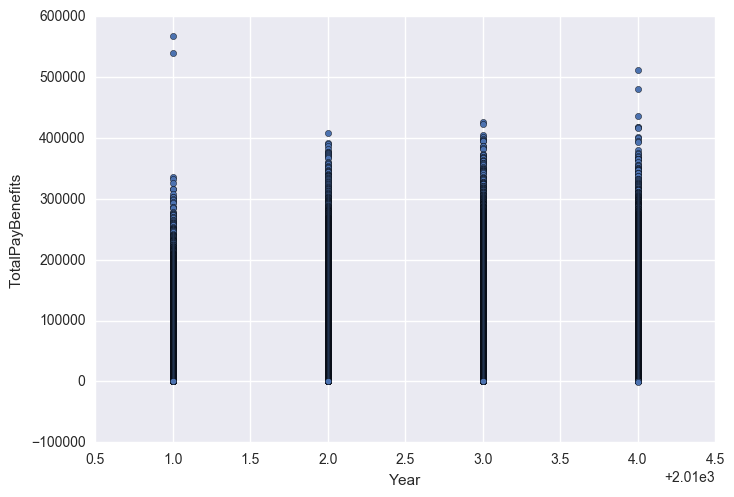

In [27]:
data.plot.scatter(x='Year',y='TotalPayBenefits')

# Korelacje między zmiennymi

In [28]:
data.corr(method='pearson', min_periods=1)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
BasePay,1.000000,0.268119,0.281787,0.654139,0.954690,0.946861,0.030885
OvertimePay,0.268119,1.000000,0.316592,0.226165,0.504859,0.467981,0.027887
OtherPay,0.281787,0.316592,1.000000,0.160334,0.470496,0.422341,-0.002499
Benefits,0.654139,0.226165,0.160334,1.000000,0.632187,0.781955,0.461466
TotalPay,0.954690,0.504859,0.470496,0.632187,1.000000,0.977312,0.032145
TotalPayBenefits,0.946861,0.467981,0.422341,0.781955,0.977312,1.000000,0.152009
Year,0.030885,0.027887,-0.002499,0.461466,0.032145,0.152009,1.000000


# Dodanie kolumny FirstName

In [29]:
data['FirstName'] = data['EmployeeName'].apply(lambda x: x.split(' ')[0])
print data.FirstName.describe()


count      148650
unique       9450
top       MICHAEL
freq         2762
Name: FirstName, dtype: object


# Dodanie kolumny płeć

In [30]:
#przygotowanie danych i połączenie z danymi do eksploracji
firstnames['name'] = firstnames['name'].apply(lambda x: x.upper())
firstnames = firstnames[firstnames['gender.prob'] > 0.7]
firstnames_renamed = firstnames.rename(columns={'name': 'FirstName', 'sex': 'Gender'})
print ""

In [31]:
data = pd.merge(data, firstnames_renamed, on='FirstName', how='left')
data.drop(["gender.prob"],1,inplace=True)

In [32]:
print "Niewypełnienie pola Gender: " + str(float(len(data[data.Gender.isnull()]))/len(data)*100) + "%" 

Niewypełnienie pola Gender: 14.8960645812%


# Kobiety vs Mężczyźni

In [33]:
#females = data[data.Gender == "F"]
#males = data[data.Gender == "M"]
#other = data[data.Gender.isnull()]

# Przydzielanie do typów pracy

In [34]:
from scipy.cluster.hierarchy import fclusterdata
from sklearn.cluster import dbscan
#from sklearn.cluster import ward_tree


jobTitlesUnique = data.JobTitle.unique()

jobTitlesUniquePd = pd.DataFrame({ 'JobTitle' : jobTitlesUnique})

jobTitlesUniquePd["JobTitle"] = jobTitlesUniquePd.JobTitle.astype("category")

clusteringdata = pd.DataFrame({ 'id' : jobTitlesUniquePd.index})

def worddist(p1, p2):
    first = jobTitlesUniquePd.loc[int(p1)]
    second = jobTitlesUniquePd.loc[int(p2)]
    return lev(first,second)


#scan = dbscan(clusteringdata, min_samples=1, eps=2, metric=worddist)
#scan

#fclusterdata(clusteringdata,1.,metric=worddist)


In [35]:
grouped = data.groupby(['JobTitle'])

grouped.describe()

BasePay  \
JobTitle                                                             
ACCOUNT CLERK                                  count    351.000000   
                                               mean   42229.915897   
                                               std    17053.228261   
                                               min        0.000000   
                                               25%    35633.515000   
                                               50%    49777.800000   
                                               75%    53129.120000   
                                               max    60838.200000   
ACCOUNTANT                                     count      5.000000   
                                               mean   46643.172000   
                                               std    27703.019579   
                                               min        0.000000   
                                               25%    42522.300000   
                                               50%    60076.240000   
                                               75%    65225.310000   
                                               max    65392.010000   
ACCOUNTANT I                                   count      8.000000   
                                               mean   61777.832500   
                                               std    17286.194149   
                                               min    19919.230000   
                                               25%    64053.872500   
                                               50%    67403.330000   
                                               75%    70909.835000   
                                               max    71605.000000   
ACCOUNTANT II                                  count    226.000000   
                                               mean   66880.084425   
                                               std    14172.334745   
                                               min     1667.400000   
                                               25%    63471.200000   
                                               50%    69386.635000   
...                                                            ...   
X-RAY LABORATORY AIDE                          std    19800.649544   
                                               min     1007.000000   
                                               25%    26078.090000   
                                               50%    55251.635000   
                                               75%    62199.500000   
                                               max    66123.010000   
YOUTH COMM ADVISOR                             count      4.000000   
                                               mean   39077.957500   
                                               std    19974.143972   
                                               min    13915.800000   
                                               25%    27792.015000   
                                               50%    42425.650000   
                                               75%    53711.592500   
                                               max    57544.730000   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS count      1.000000   
                                               mean   52609.910000   
                                               std             NaN   
                                               min    52609.910000   
                                               25%    52609.910000   
                                               50%    52609.910000   
                                               75%    52609.910000   
                                               max    52609.910000   
ZOO CURATOR                                    count      1.000000   
                                               mean   43148.000000   
                                               std             NaN   

In [140]:
#data[data.JobTitle == 'ACCOUNT CLERK'].groupby(['Gender']).describe()
#data[data.JobTitle == 'ACCOUNT CLERK'].groupby(['Year', 'Gender']).describe().hist()

firedata = data[data['JobTitle'].map(lambda x: x.find('FIRE') != -1)]
policedata = data[data['JobTitle'].map(lambda x: x.find('POLICE') != -1)]
medicaldata = data[data['JobTitle'].map(lambda x: x.find('MEDICAL') != -1)]
transitdata = data[data['JobTitle'].map(lambda x: x.find('TRANSIT') != -1)]

#transitdata.plot.hexbin(x='Year', y='TotalPayBenefits', C='Gender', gridsize=25)


# Rozlokowanie różnych części płac w wybranych grupach

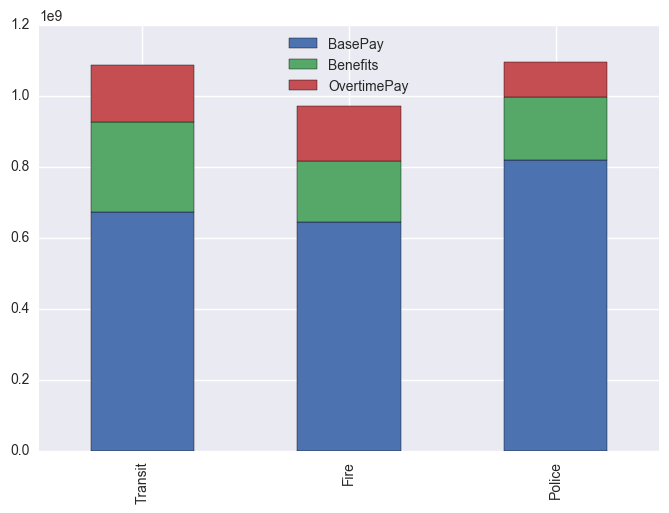

In [141]:


def createBarSet(data):
    barset = pd.DataFrame({ 'BasePay' : [data.BasePay.sum()], 'OvertimePay': [data.OvertimePay.sum()], 'Benefits': [data.Benefits.sum()]})
    return barset

bardata = createBarSet(transitdata).append(createBarSet(firedata)).append(createBarSet(policedata))

bardata.index = ['Transit', 'Fire', 'Police']

bardata.plot.bar(stacked=True)






# Płace w czasie w wybranych grupach

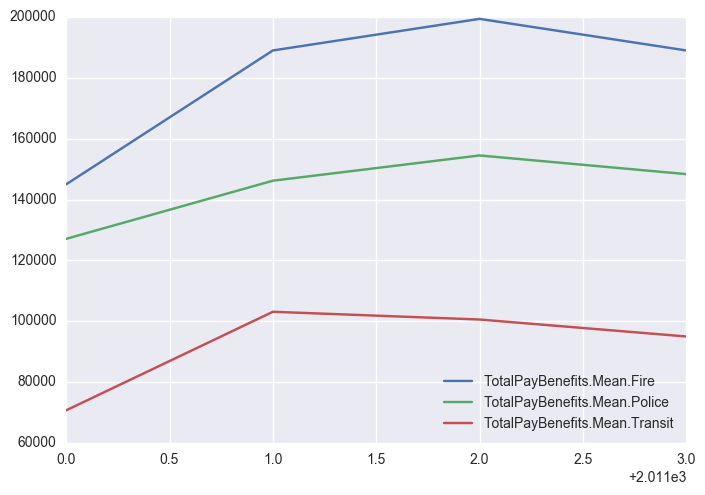

In [142]:

def createChartData(data, names):
    chartData = pd.DataFrame({
        })
    
    i = 0
    for dataitem in data:
        for year in range(2011,2015):
            cd = pd.DataFrame({
                'TotalPayBenefits.Mean.' + names[i] : [dataitem[dataitem.Year == year].TotalPayBenefits.mean()]
            })
            cd.index = [year]
            chartData = chartData.append(cd)
        i = i + 1
            
    return chartData
    
    



plt.figure()
createChartData([transitdata, firedata, policedata], ['Transit', 'Fire', 'Police']).plot()



# Dyskryminacja ze względu na płeć

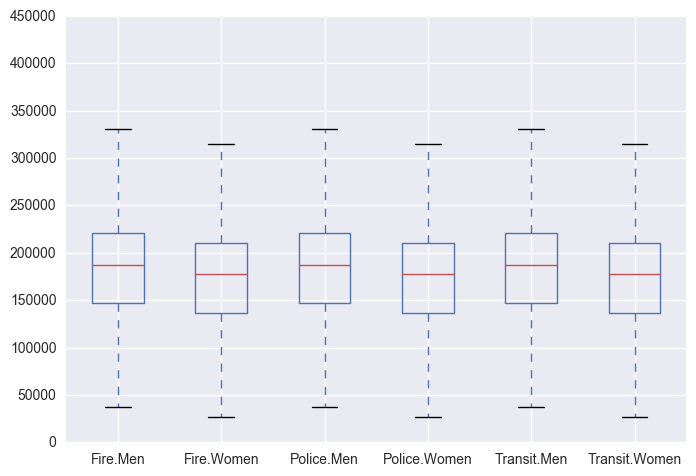

In [143]:

def createDataFrame(data, names):
    chartData = pd.DataFrame({
        })
    
    i = 0
    for dataitem in data:
        for year in range(2011,2015):
            cd = pd.DataFrame({
                names[i] + '.Women'  : firedata[firedata.Gender == 'F'].TotalPayBenefits
            })
            cd.index = [year]*len(cd)
            chartData = chartData.append(cd)
            cd = pd.DataFrame({
                names[i] + '.Men' : firedata[firedata.Gender == 'M'].TotalPayBenefits
            })
            cd.index = [year]*len(cd)
            chartData = chartData.append(cd)
        i = i + 1
            
    return chartData


createDataFrame([transitdata, firedata, policedata], ['Transit', 'Fire', 'Police']).plot.box()

# Rozalokowanie budżetu pomiędzy różne dziedziny

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000211C95F8>], dtype=object)

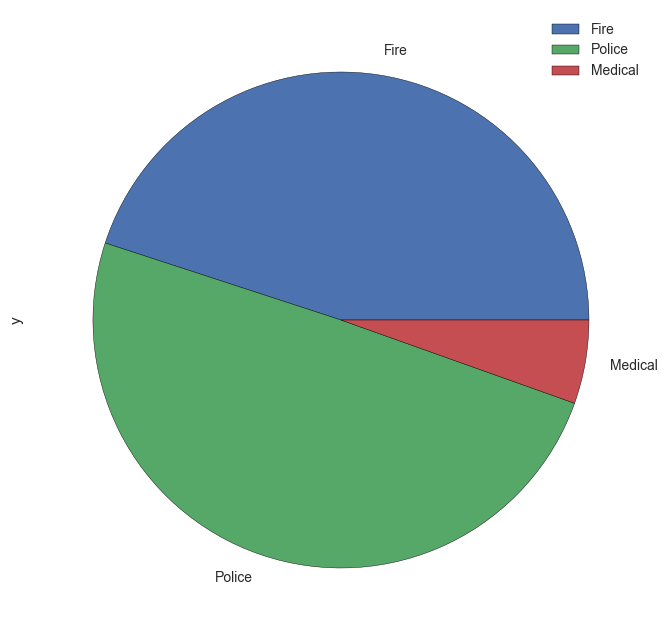

In [148]:
df = pd.DataFrame({
                'y'  : [firedata.TotalPayBenefits.sum(), policedata.TotalPayBenefits.sum(),medicaldata.TotalPayBenefits.sum()],
            },
              index=['Fire', 'Police', 'Medical'])

df.plot.pie(subplots=True, figsize=(8, 8))
